In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading a fraction of the HIGGS dataset

Loading 0.001 fraction of the dataset. Approx = 10k coloumns, ( as my system is not able to process more than this data )

In [138]:
import pandas as pd
import numpy as np

file_path = '/content/drive/MyDrive/Colab Notebooks/HIGGS.csv'

skiprow = lambda x: x>0 and np.random.rand(1)>0.001
# Read only the specified number of rows using pandas
df = pd.read_csv(file_path, skiprows=skiprow)

# Now 'df' contains 0.001% of your dataset
print(df.head())


   1.000000000000000000e+00  8.692932128906250000e-01  \
0                       0.0                  0.659199   
1                       0.0                  1.319679   
2                       1.0                  0.690676   
3                       1.0                  0.402803   
4                       0.0                  2.065074   

   -6.350818276405334473e-01  2.256902605295181274e-01  \
0                  -0.548399                  0.212374   
1                   0.542446                  0.807740   
2                  -1.620738                 -0.258806   
3                   0.775225                 -0.468544   
4                   0.397325                 -0.000796   

   3.274700641632080078e-01  -6.899932026863098145e-01  \
0                  0.728752                  -1.662330   
1                  0.443082                  -1.039247   
2                  1.555176                   0.158111   
3                  0.559019                   0.224373   
4                 

### Renaming Columns

This code renames the columns in the dataframe `df`:

- The first column is renamed to `target`.
- The remaining columns are renamed to `col0`, `col1`, `col2`, and so on, based on their index in the dataframe.

The `print(df.head())` command will display the first few rows of `df` with the updated column names.




In [139]:
df.columns = ['target'] + [f'col{i}' for i in range(len(df.columns) - 1)]

print(df.head)

<bound method NDFrame.head of        target      col0      col1      col2      col3      col4      col5  \
0         0.0  0.659199 -0.548399  0.212374  0.728752 -1.662330  1.049452   
1         0.0  1.319679  0.542446  0.807740  0.443082 -1.039247  0.490740   
2         1.0  0.690676 -1.620738 -0.258806  1.555176  0.158111  1.274440   
3         1.0  0.402803  0.775225 -0.468544  0.559019  0.224373  0.942547   
4         0.0  2.065074  0.397325 -0.000796  0.170076  1.645970  1.294685   
...       ...       ...       ...       ...       ...       ...       ...   
10982     0.0  0.736978  0.367132  0.293938  0.763486 -1.346998  0.927340   
10983     0.0  2.185495 -0.525997  0.704536  1.253423  0.541654  1.111928   
10984     1.0  1.591996 -0.611707  0.745595  1.361261 -0.053990  0.743393   
10985     1.0  0.928588  0.818080  1.339297  1.569198 -1.403004  0.712063   
10986     1.0  0.856483 -0.082842  1.277153  0.381315 -1.128253  1.722582   

           col6      col7      col8  ...     

In [140]:
print(df.shape)

(10987, 29)


### Feature Distribution Visualization

This code generates histograms for all columns in the dataframe `df`, allowing us to observe the distribution of each feature.

- `df.hist(bins=50, figsize=(20, 15))`: Plots histograms with 50 bins for each feature in `df`.
- `plt.show()`: Displays the histograms.


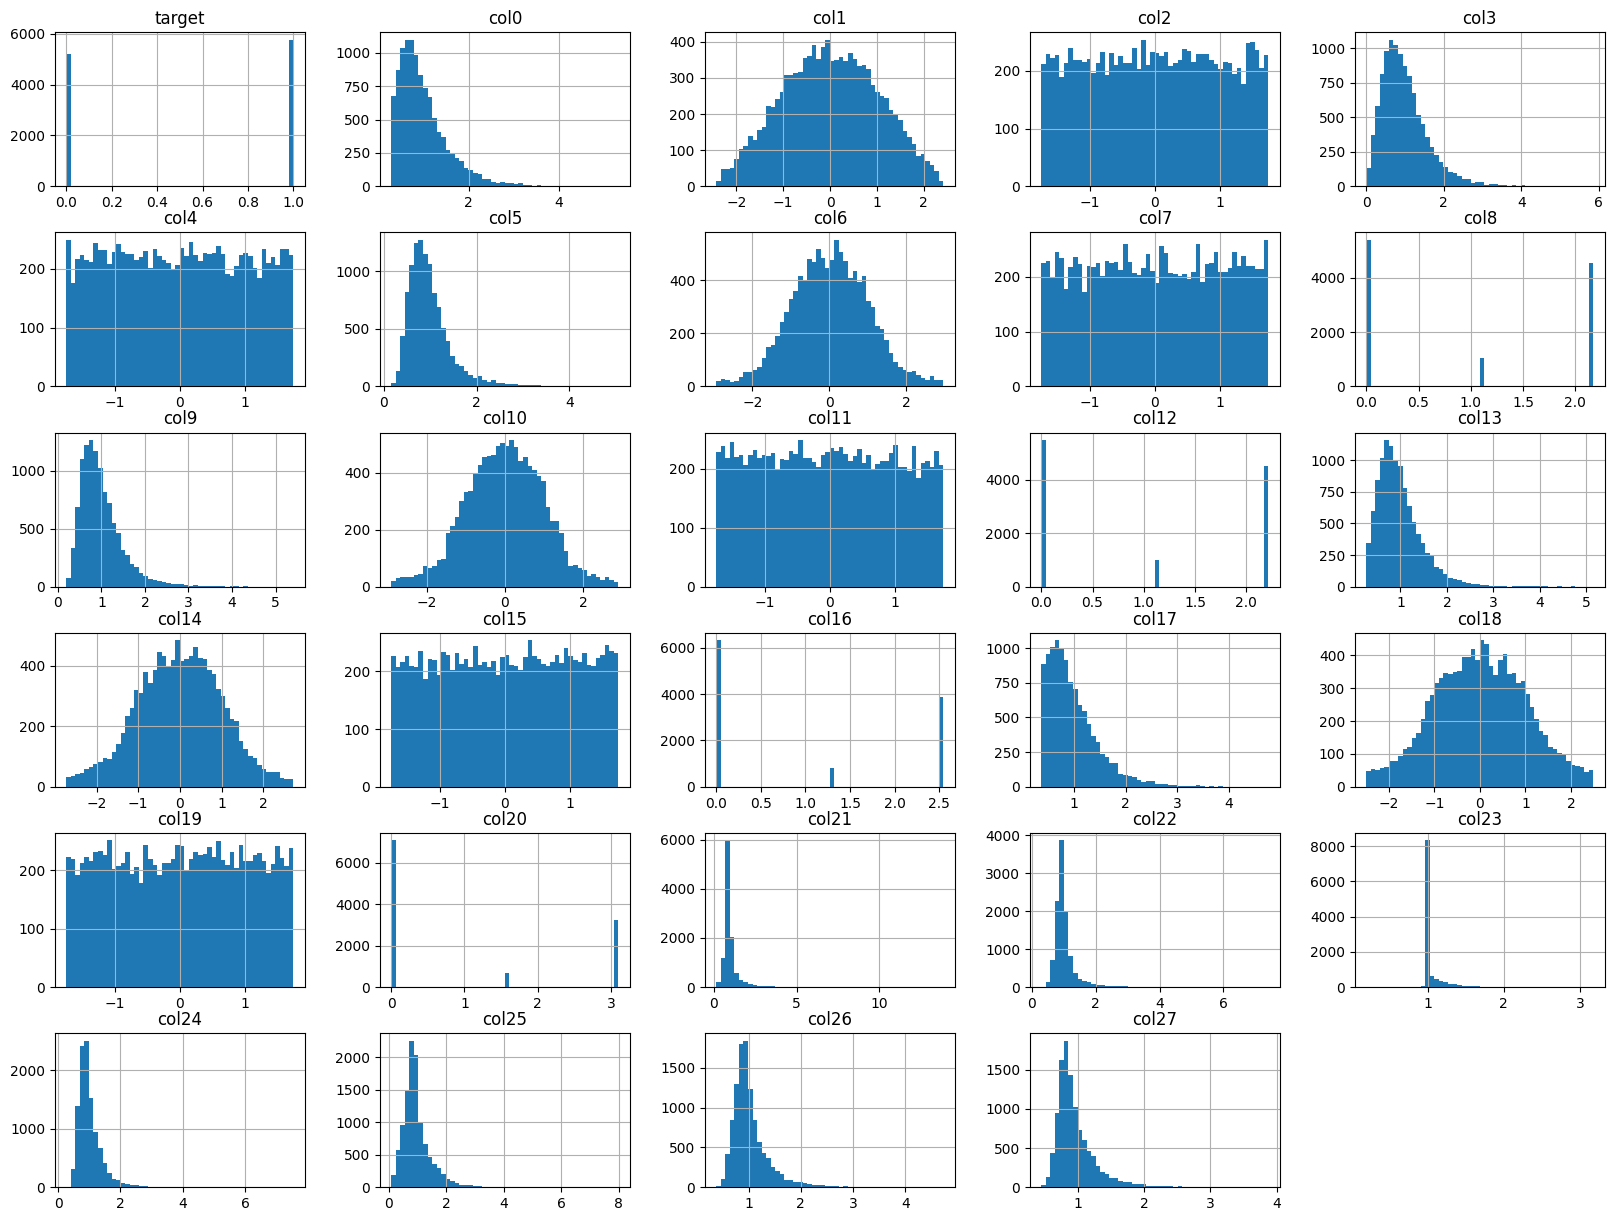

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=50, figsize=(20, 15))
plt.show()

### Identifying Outliers with Boxplots

This visualization generates boxplots for each feature in the dataframe `df` to help identify potential outliers.

- Each boxplot represents the distribution of values for a feature, including the interquartile range (IQR) and any data points that fall outside the whiskers (typically representing outliers).
- The plot's size is set to provide a clear view of all features, allowing for easier comparison and identification of outliers.

The boxplots display variations and potential anomalies within each feature.


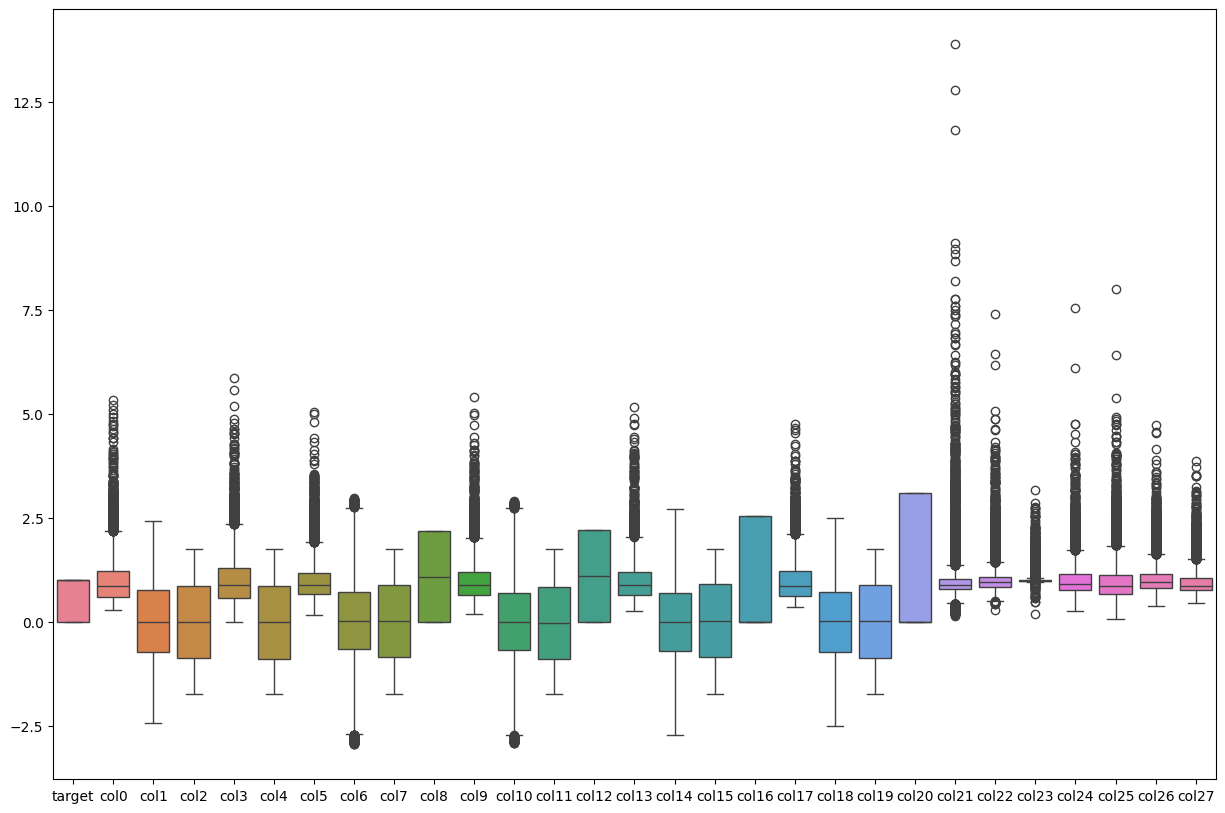

In [142]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.show()

### Outlier Removal and Visualization

This code removes outliers from selected features in the dataframe `df` using the interquartile range (IQR) method, and then visualizes the cleaned dataset.

- **Outlier Removal**:
  - The function `remove_outliers` calculates the IQR for each specified feature and filters out any values outside 1.5 times the IQR from the first and third quartiles.
  - The list `features_to_clean` specifies the columns to clean, excluding the target column.
  - `df_no_outliers` contains the cleaned dataset with outliers removed.

- **Visualization**:
  - Histograms are generated for each feature in the cleaned dataset to show the distribution after removing outliers.
  - Boxplots are displayed for `df_no_outliers` to verify the absence of outliers and visualize the feature distributions.

The final shape of `df_no_outliers` is printed to confirm the dataset’s size after outlier removal.


(4846, 29)


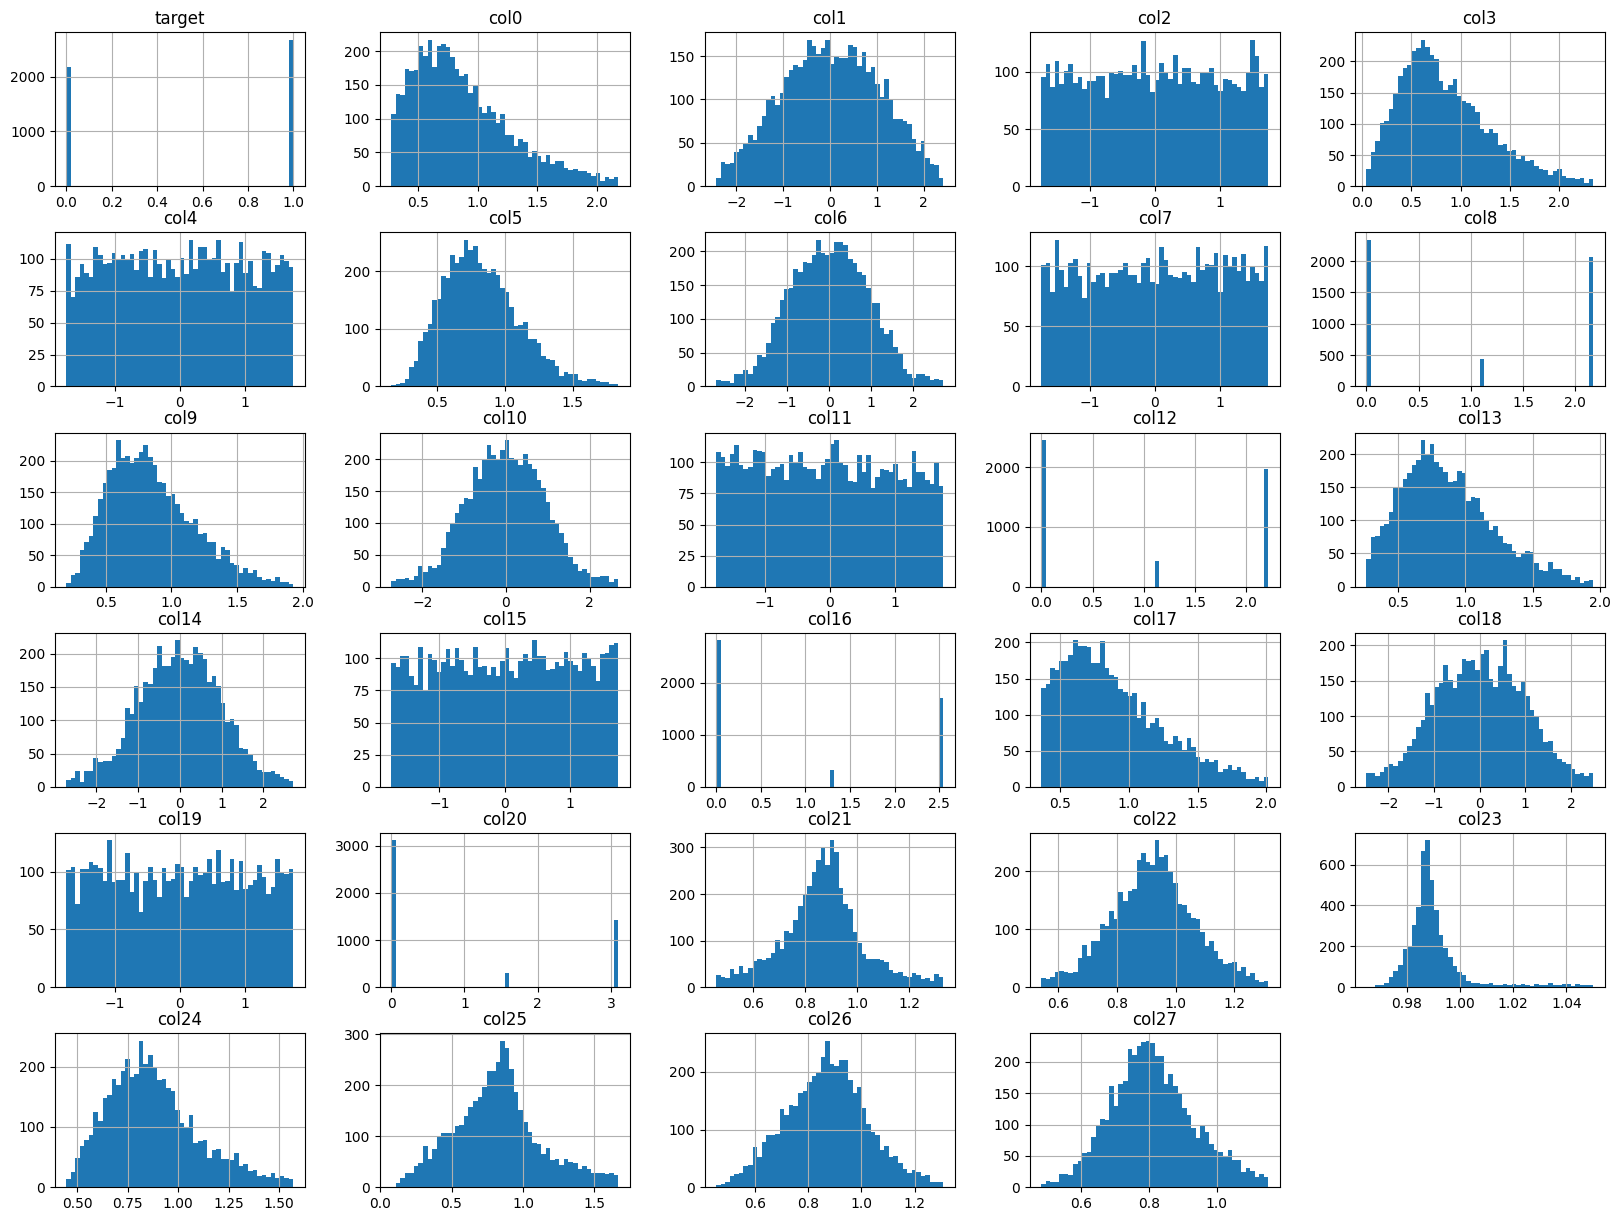

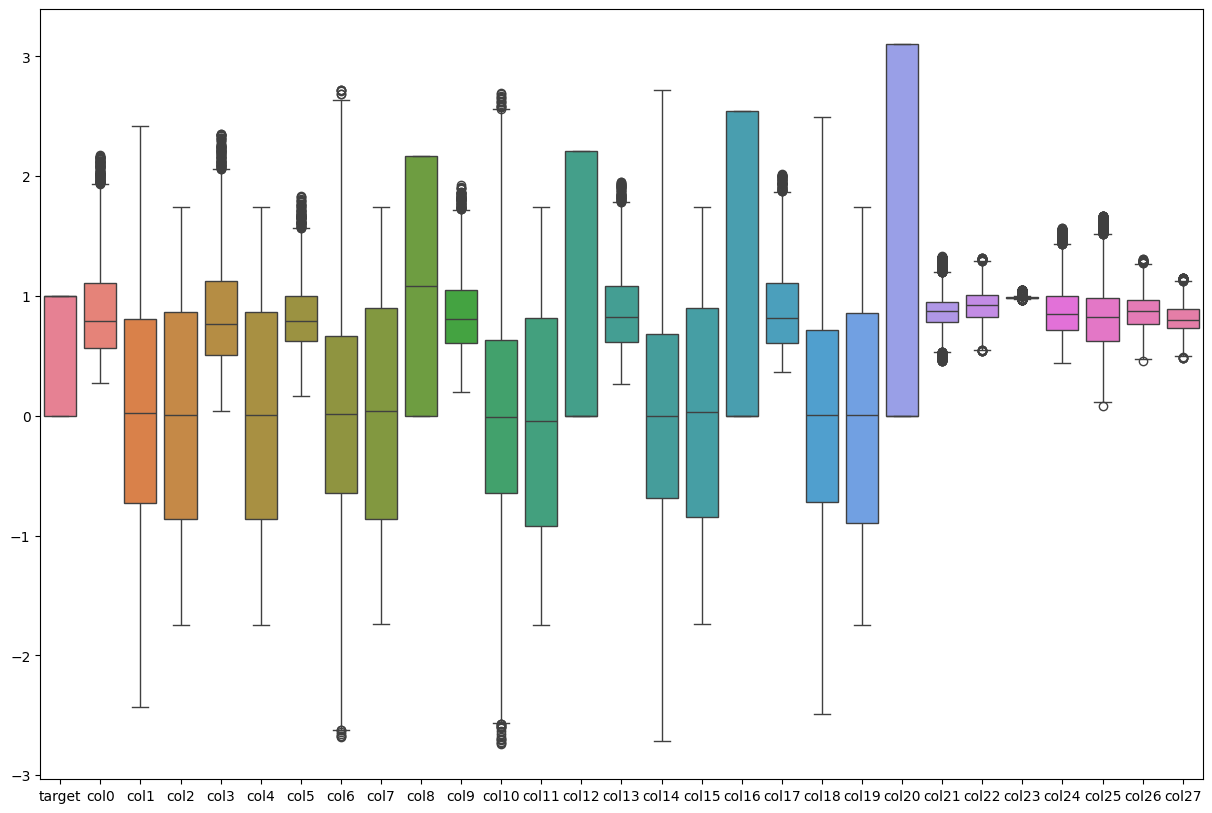

In [143]:
def remove_outliers(df, features):
    df_cleaned = df.copy()
    for col in features:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

features_to_clean = [col for col in df.columns if col != 'target']
df_no_outliers = remove_outliers(df, features_to_clean)

print(df_no_outliers.shape)
df_no_outliers.hist(bins=50, figsize=(20, 15))
plt.show()
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_no_outliers)
plt.show()

In [144]:
df = df_no_outliers # Dataset is now the dataset with no outliers

In [145]:
print(df.shape)
print(df.head)

(4846, 29)
<bound method NDFrame.head of        target      col0      col1      col2      col3      col4      col5  \
0         0.0  0.659199 -0.548399  0.212374  0.728752 -1.662330  1.049452   
2         1.0  0.690676 -1.620738 -0.258806  1.555176  0.158111  1.274440   
3         1.0  0.402803  0.775225 -0.468544  0.559019  0.224373  0.942547   
7         0.0  0.409208  1.107348  1.141766  0.696096  0.009580  1.167168   
8         1.0  0.676402 -1.612946 -1.683693  0.756783 -0.463000  0.797441   
...       ...       ...       ...       ...       ...       ...       ...   
10978     1.0  0.501079  0.024295 -0.137847  0.837409  0.417748  0.444753   
10980     0.0  0.489366 -0.548399 -1.353550  2.081728  1.384546  0.686046   
10981     1.0  0.515537  0.729448  1.702731  0.170224 -0.873617  1.441348   
10982     0.0  0.736978  0.367132  0.293938  0.763486 -1.346998  0.927340   
10985     1.0  0.928588  0.818080  1.339297  1.569198 -1.403004  0.712063   

           col6      col7      col

In [146]:
print(df['target'].value_counts())
print(df.isnull().sum())

target
1.0    2676
0.0    2170
Name: count, dtype: int64
target    0
col0      0
col1      0
col2      0
col3      0
col4      0
col5      0
col6      0
col7      0
col8      0
col9      0
col10     0
col11     0
col12     0
col13     0
col14     0
col15     0
col16     0
col17     0
col18     0
col19     0
col20     0
col21     0
col22     0
col23     0
col24     0
col25     0
col26     0
col27     0
dtype: int64


In [147]:

from sklearn.preprocessing import StandardScaler

# Drop rows with NaN values
df.dropna(inplace=True)

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add the target variable back to the DataFrame
df_scaled['target'] = y

# Drop rows with NaN values
df_scaled.dropna(inplace=True)

# Now df_scaled contains the standardized features and the target variable
print(df_scaled.head)
df_scaled.shape

<bound method NDFrame.head of           col0      col1      col2      col3      col4      col5      col6  \
0    -0.532908 -0.554148  0.207351 -0.260115 -1.664972  0.789673  0.352277   
2    -1.161045  0.715784 -0.469233 -0.625578  0.225329  0.409298  1.700822   
3    -1.145353  1.034435  1.130828 -0.330430  0.010126  1.208510  0.214886   
7     2.789805 -0.940080 -1.526135 -1.224426  1.031239 -1.826345 -0.278665   
8     0.869079  0.560663  0.776323 -0.454630 -0.167295 -1.523544 -1.642006   
...        ...       ...       ...       ...       ...       ...       ...   
4832  0.555234 -1.452164 -0.720091 -1.053670 -1.021256 -1.409790  0.127167   
4833 -0.335635  1.008270  0.961570  1.506736  0.199619 -0.924461 -0.726771   
4838 -0.914902  0.284063  0.709612  0.713410 -0.782521  0.385830  0.362845   
4841 -0.920282 -0.004685 -0.140641 -0.026161  0.419073 -1.361876  0.878590   
4844 -0.342360  0.324245  0.288396 -0.185328 -1.349039  0.355191 -0.215254   

          col7      col8      col

(2116, 29)

In [ ]:

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)  # Adjust degree as needed
X_poly = poly.fit_transform(df_scaled.drop('target', axis=1))

# Create a new DataFrame with polynomial features
poly_feature_names = poly.get_feature_names_out(df_scaled.drop('target', axis=1).columns)
df_poly = pd.DataFrame(X_poly, columns=poly_feature_names)
df_poly['target'] = df_scaled['target']

# Drop rows with NaN values
df_poly.dropna(inplace=True)

# Now df_poly contains the original features, scaled features, and polynomial features
print(df_poly.head)
df_poly.shape

<bound method NDFrame.head of           col0      col1      col2      col3      col4      col5      col6  \
0    -0.532908 -0.554148  0.207351 -0.260115 -1.664972  0.789673  0.352277   
2    -1.145353  1.034435  1.130828 -0.330430  0.010126  1.208510  0.214886   
3     2.789805 -0.940080 -1.526135 -1.224426  1.031239 -1.826345 -0.278665   
7     0.214489 -1.193319 -0.747657 -0.268737  0.302838 -0.280723 -0.687667   
8     0.597827 -0.641987  0.148358 -1.220756 -0.119128  0.635176  0.739085   
...        ...       ...       ...       ...       ...       ...       ...   
2105 -0.258519  0.895200  1.649629  0.417774  0.620847  0.906035  0.851112   
2110  1.707491  1.114799  0.450487 -0.578811 -0.047930 -0.309081 -0.295574   
2112 -0.335635  1.008270  0.961570  1.506736  0.199619 -0.924461 -0.726771   
2114 -0.920282 -0.004685 -0.140641 -0.026161  0.419073 -1.361876  0.878590   
2115 -0.342360  0.324245  0.288396 -0.185328 -1.349039  0.355191 -0.215254   

          col7      col8      col

(914, 435)

In [149]:
print(df_poly['target'].value_counts())
print(df_poly.isnull().sum())

target
1.0    519
0.0    395
Name: count, dtype: int64
col0           0
col1           0
col2           0
col3           0
col4           0
              ..
col25 col27    0
col26^2        0
col26 col27    0
col27^2        0
target         0
Length: 435, dtype: int64


In [150]:


from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression

# Separate features (X) and target (y)
X = df_poly.drop('target', axis=1)
y = df_poly['target']

# 1. Recursive Feature Elimination (RFE)
estimator = LogisticRegression(max_iter=1000)  # Use a suitable estimator
selector_rfe = RFE(estimator, n_features_to_select=10, step=1) # Select top 10
X_rfe = selector_rfe.fit_transform(X, y)

# Print the selected features
selected_features_rfe = np.array(X.columns)[selector_rfe.support_]
print("Selected Features (RFE):", selected_features_rfe)

# 2. SelectKBest
selector_kbest = SelectKBest(score_func=f_classif, k=10)  # Select top 10
X_kbest = selector_kbest.fit_transform(X, y)

# Print the selected features
selected_features_kbest = np.array(X.columns)[selector_kbest.get_support()]
print("Selected Features (SelectKBest):", selected_features_kbest)

Selected Features (RFE): ['col22' 'col4^2' 'col6 col27' 'col7 col23' 'col10 col26' 'col10 col27'
 'col12 col18' 'col13 col23' 'col17 col22' 'col17 col25']
Selected Features (SelectKBest): ['col13' 'col4^2' 'col6^2' 'col6 col27' 'col7 col23' 'col9 col10'
 'col12 col18' 'col17^2' 'col17 col22' 'col18 col25']


In [ ]:

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC



# Initialize the SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', probability=True) #probability=True for AUC

# Perform cross-validation
y_pred = cross_val_predict(svm_classifier, X_rfe, y, cv=5) #5-fold cross-validation

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Predict probabilities for AUC calculation
y_prob = cross_val_predict(svm_classifier, X_rfe, y, cv=5, method='predict_proba')
auc = roc_auc_score(y, y_prob[:, 1]) #probability of positive class


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")

Accuracy: 0.5864332603938731
Precision: 0.5959183673469388
Recall: 0.8439306358381503
F1-score: 0.6985645933014354
AUC: 0.6045340357552256


In [ ]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Mini-batch learning with Stochastic Gradient Descent (SGD) for SVM

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SGDClassifier with the 'hinge' loss (for SVM)
from sklearn.linear_model import SGDClassifier

sgd_svm = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=42, n_jobs=-1)
sgd_svm.fit(X_train, y_train)
y_pred_sgd = sgd_svm.predict(X_test)
print(f"SGD SVM accuracy: {accuracy_score(y_test, y_pred_sgd)}")

# 2.  Mini-batch Gradient Descent with a library like TensorFlow/Keras (More advanced)
# This approach is more flexible for larger datasets and allows for more customization

import tensorflow as tf

# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
              metrics=['accuracy'])


# Train the model in mini-batches
batch_size = 32 # Adjust as needed
epochs = 10  # Adjust as needed

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print(f"Keras model accuracy: {accuracy}")


# Example of using a smaller subset of the data for testing
subset_size = 1000  # Adjust this value
X_subset = X_train[:subset_size]
y_subset = y_train[:subset_size]

# Train the model on a smaller subset
model.fit(X_subset, y_subset, epochs=epochs, batch_size=batch_size)

# Evaluate the model on the subset
_, subset_accuracy = model.evaluate(X_test, y_test)
print(f"Keras model accuracy on a subset: {subset_accuracy}")

SGD SVM accuracy: 0.44808743169398907


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4655 - loss: 0.8563   
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6845 - loss: 0.5929 
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7854 - loss: 0.4667 
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8958 - loss: 0.3866 
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9501 - loss: 0.3287 
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9815 - loss: 0.2631 
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9932 - loss: 0.2175 
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9916 - loss: 0.1944
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9993 - loss: 0.1542 
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9983 - loss: 0.1304 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4753 - loss: 0.9320  
Keras model accuracy: 0.45355191826820374
Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━

In [ ]:

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import time


# Define the kernels and their parameters for GridSearchCV or RandomizedSearchCV

kernels = {
    'poly': {
        'kernel': ['poly'],
        'degree': [2, 3, 4],
        'C': [0.1, 1.0, 10.0],  # Regularization parameter
    },
    'rbf': {
        'kernel': ['rbf'],
        'gamma': [0.01, 0.1, 1],
        'C': [0.1, 1.0, 10.0]
    },
    'custom': {  # Example custom kernel
        'kernel': ['sigmoid'],  # Or your custom kernel function
        'coef0': [0, 1], # for sigmoid kernel
        'C': [0.1, 1.0, 10.0]
    },
}

# Function to evaluate and time models
def evaluate_model(model, X_train, y_train, X_test, y_test):
  start_time = time.time()
  model.fit(X_train, y_train)
  end_time = time.time()
  training_time = end_time - start_time

  start_time = time.time()
  y_pred = model.predict(X_test)
  end_time = time.time()
  prediction_time = end_time - start_time

  print(classification_report(y_test, y_pred))
  if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, y_prob)
    print(f"AUC: {auc}")
  return training_time, prediction_time


results = {}

for kernel_name, params in kernels.items():
  print(f"Evaluating {kernel_name} kernel...")
  svm = SVC(probability=True)  # probability=True for AUC calculation

  # Using GridSearchCV for parameter tuning (or RandomizedSearchCV for larger datasets)
  grid_search = GridSearchCV(svm, params, cv=3, n_jobs=-1, scoring='accuracy') # Adjust cv and scoring as needed

  # Train and evaluate the model
  training_time, prediction_time = evaluate_model(grid_search, X_train, y_train, X_test, y_test)

  results[kernel_name] = {
      'best_params': grid_search.best_params_,
      'best_score': grid_search.best_score_,
      'training_time': training_time,
      'prediction_time': prediction_time
  }

# Print results
for kernel_name, result in results.items():
    print(f"\nResults for {kernel_name} kernel:")
    print(f"Best parameters: {result['best_params']}")
    print(f"Best score: {result['best_score']}")
    print(f"Training time: {result['training_time']} seconds")
    print(f"Prediction time: {result['prediction_time']} seconds")

Evaluating poly kernel...
              precision    recall  f1-score   support

         0.0       0.25      0.01      0.02        81
         1.0       0.55      0.97      0.70       102

    accuracy                           0.55       183
   macro avg       0.40      0.49      0.36       183
weighted avg       0.42      0.55      0.40       183

AUC: 0.4699830549503753
Evaluating rbf kernel...
              precision    recall  f1-score   support

         0.0       0.14      0.01      0.02        81
         1.0       0.55      0.94      0.69       102

    accuracy                           0.53       183
   macro avg       0.34      0.48      0.36       183
weighted avg       0.37      0.53      0.40       183

AUC: 0.5689905591866378
Evaluating custom kernel...
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        81
         1.0       0.56      1.00      0.72       102

    accuracy                           0.56       183
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [154]:

# Define the kernels and their parameters for RandomizedSearchCV
kernels = {
    'poly': {
        'kernel': ['poly'],
        'degree': [2, 3, 4],
        'C': [0.1, 1.0, 10.0],  # Regularization parameter
    },
    'rbf': {
        'kernel': ['rbf'],
        'gamma': [0.01, 0.1, 1],
        'C': [0.1, 1.0, 10.0]
    },
    'sigmoid': {
        'kernel': ['sigmoid'],
        'coef0': [0, 1],
        'C': [0.1, 1.0, 10.0]
    },
}

# Function to evaluate and time models
def evaluate_model(model, X_train, y_train, X_test, y_test):
  start_time = time.time()
  model.fit(X_train, y_train)
  end_time = time.time()
  training_time = end_time - start_time

  start_time = time.time()
  y_pred = model.predict(X_test)
  end_time = time.time()
  prediction_time = end_time - start_time

  print(classification_report(y_test, y_pred))
  if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, y_prob)
    print(f"AUC: {auc}")
  return training_time, prediction_time


results = {}

for kernel_name, params in kernels.items():
  print(f"Evaluating {kernel_name} kernel...")
  svm = SVC(probability=True)  # probability=True for AUC calculation

  # Using RandomizedSearchCV for parameter tuning
  random_search = RandomizedSearchCV(svm, params, n_iter=5, cv=3, n_jobs=-1, scoring='accuracy', random_state=42)

  # Train and evaluate the model
  training_time, prediction_time = evaluate_model(random_search, X_train, y_train, X_test, y_test)

  results[kernel_name] = {
      'best_params': random_search.best_params_,
      'best_score': random_search.best_score_,
      'training_time': training_time,
      'prediction_time': prediction_time
  }

# Print results
for kernel_name, result in results.items():
    print(f"\nResults for {kernel_name} kernel:")
    print(f"Best parameters: {result['best_params']}")
    print(f"Best score: {result['best_score']}")
    print(f"Training time: {result['training_time']} seconds")
    print(f"Prediction time: {result['prediction_time']} seconds")

Evaluating poly kernel...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        81
         1.0       0.56      1.00      0.72       102

    accuracy                           0.56       183
   macro avg       0.28      0.50      0.36       183
weighted avg       0.31      0.56      0.40       183

AUC: 0.523117889130961
Evaluating rbf kernel...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        81
         1.0       0.56      1.00      0.72       102

    accuracy                           0.56       183
   macro avg       0.28      0.50      0.36       183
weighted avg       0.31      0.56      0.40       183

AUC: 0.5285039941902688
Evaluating sigmoid kernel...
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        81
         1.0       0.56      1.00      0.72       102

    accuracy                           0.56       183
   macro avg       0.28      0.50      0.36       183
weighted avg       0.31      0.56      0.40       183

AUC: 0.4745824255628177

Results for poly kernel:
Best parameters: {'kernel': 'poly', 'degree': 3, 'C': 0.1}
Best score: 0.5718253165126268
Training time: 4.6389806270599365 seconds
Prediction time: 0.025223255157470703 seconds

Results for rbf kernel:
Best parameters: {'kernel': 'rbf', 'gamm

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


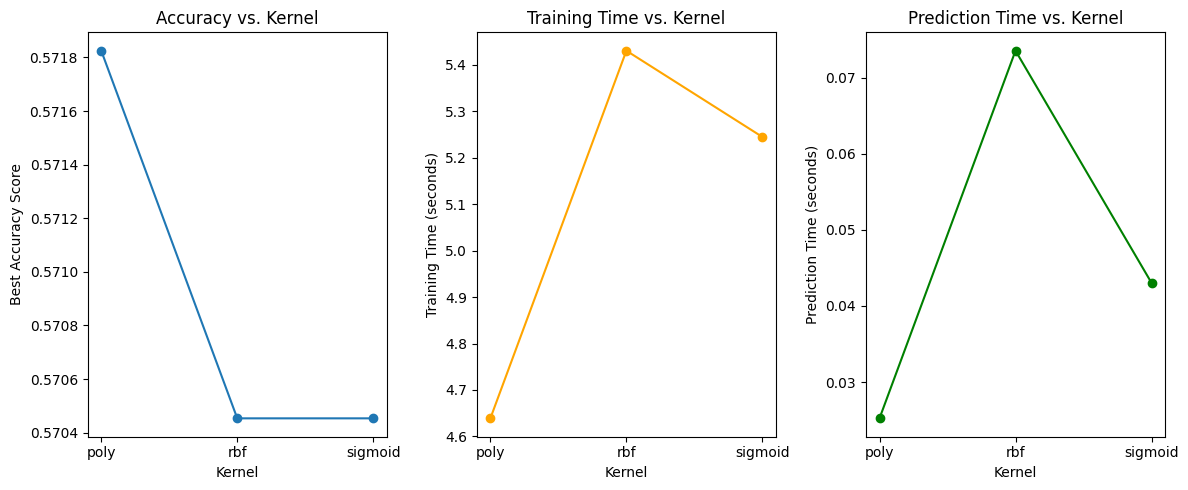

In [ ]:

import matplotlib.pyplot as plt



kernel_names = []
best_scores = []
training_times = []
prediction_times = []

for kernel_name, result in results.items():
    kernel_names.append(kernel_name)
    best_scores.append(result['best_score'])
    training_times.append(result['training_time'])
    prediction_times.append(result['prediction_time'])

# Create line plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(kernel_names, best_scores, marker='o')
plt.xlabel("Kernel")
plt.ylabel("Best Accuracy Score")
plt.title("Accuracy vs. Kernel")


plt.subplot(1, 3, 2)
plt.plot(kernel_names, training_times, marker='o', color='orange')
plt.xlabel("Kernel")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time vs. Kernel")


plt.subplot(1, 3, 3)
plt.plot(kernel_names, prediction_times, marker='o', color='green')
plt.xlabel("Kernel")
plt.ylabel("Prediction Time (seconds)")
plt.title("Prediction Time vs. Kernel")

plt.tight_layout()
plt.show()

In [ ]:

import lime
import lime.lime_tabular



# Create a LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,  # Training data
    feature_names=X_train.columns.tolist(), # Feature names
    class_names=['0', '1'], # Class names (adjust if needed)
    discretize_continuous=True # Discretize continuous features (optional)
)


# Choose an instance from your test data to explain
instance_index = 0  # Example index, change as needed
instance = X_test.iloc[instance_index]


# Explain the prediction for the instance
exp = explainer.explain_instance(
    data_row=instance.values,
    predict_fn=best_model.predict_proba, # Use the predict_proba method
    num_features=10 # Number of features to display in the explanation
)

# Display the explanation
exp.show_in_notebook(show_table=True)

# Alternatively, you can get the explanation as text:
print(exp.as_list())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[('0.14 < col23^2 <= 0.55', -0.008393170267927231), ('col12 col18 > 0.71', -0.007928661301870452), ('col2 col15 > 0.39', 0.006549209475712331), ('col6 col27 <= -0.35', 0.006511519449399621), ('col10 col17 > 0.42', -0.006496348910325022), ('col1 col9 <= -0.40', 0.006263358905143958), ('col1 col16 <= -0.70', 0.006049718311572612), ('col18 col27 > 0.42', 0.005978499761818389), ('col6^2 <= 0.11', 0.00512831214299248), ('col2 col11 > 0.33', 0.004964124893117921)]
